In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt

# Line styles
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['lines.antialiased'] = True
mpl.rcParams['lines.dashed_pattern'] = 2.8, 1.5
mpl.rcParams['lines.dashdot_pattern'] = 4.8, 1.5, 0.8, 1.5
mpl.rcParams['lines.dotted_pattern'] = 1.1, 1.1
mpl.rcParams['lines.scale_dashes'] = True

# Default colors
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler('color',['cornflowerblue','forestgreen','maroon','goldenrod','firebrick','mediumorchid', 'navy', 'brown'])

# Fonts
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'CMU Serif'
mpl.rcParams['font.sans-serif'] = 'CMU Sans Serif, DejaVu Sans, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif'
mpl.rcParams['text.usetex'] = True

# Axes
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['axes.labelpad'] = 9.0
                                                  
                                                  
# Tick marks - the essence of life
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 2.5
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.75
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.minor.size'] = 2.5
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.75
mpl.rcParams['ytick.major.pad'] = 8
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.minor.visible'] = True

# Legend
mpl.rcParams['legend.fontsize'] = 20
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.framealpha'] = 1.
#mpl.rcParams['legend.edgecolor'] = 'black'
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.borderpad'] = 0.4 # border whitespace
mpl.rcParams['legend.labelspacing'] = 0.5 # the vertical space between the legend entries
mpl.rcParams['legend.handlelength'] = 1.5 # the length of the legend lines
mpl.rcParams['legend.handleheight'] = 0.7 # the height of the legend handle
mpl.rcParams['legend.handletextpad'] = 0.5 # the space between the legend line and legend text
mpl.rcParams['legend.borderaxespad'] = 0.5 # the border between the axes and legend edge
mpl.rcParams['legend.columnspacing'] = 2.0 # column separation


# Figure size
mpl.rcParams['figure.figsize'] = 12, 6
mpl.rcParams['figure.dpi'] = 200

# Save details
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.pad_inches'] = 0.1

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']

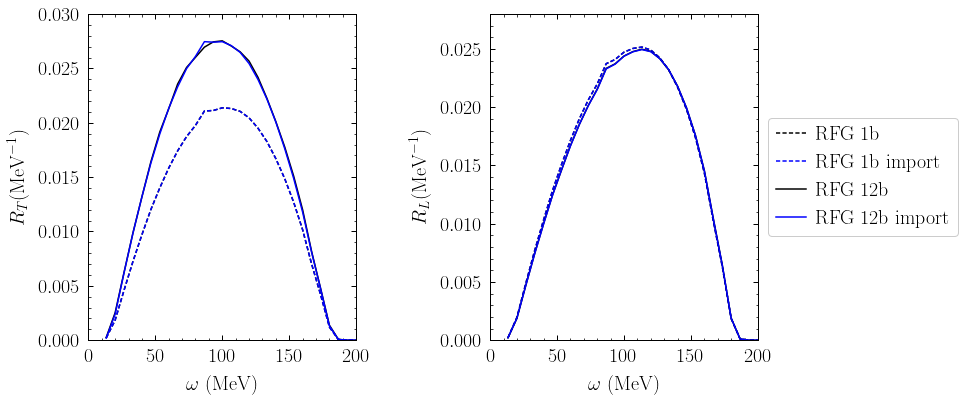

In [15]:
#(*Inputing MC predictions with form factor errors*)
#Grab prediction
pred_dir='/Users/noah/Desktop/Noah_interference/'

onebodyAle_df = pd.read_csv(pred_dir+'1b.out',sep="\s+|\t+|\s+\t+|\t+\s+", engine='python')
onebodyAle_df.columns = ['w', 'rl', 'rt']

twobodyAle_df = pd.read_csv(pred_dir+'2b_Ale.out',sep="\s+|\t+|\s+\t+|\t+\s+", engine='python')
twobodyAle_df.columns = ['w', 'rl', 'rt']

twobodyImport_df = pd.read_csv(pred_dir+'2b_import.out',sep="\s+|\t+|\s+\t+|\t+\s+", engine='python')
twobodyImport_df.columns = ['w', 'rl', 'rt'] 

onebodyImport_df = pd.read_csv(pred_dir+'1b_import.out',sep="\s+|\t+|\s+\t+|\t+\s+", engine='python')
onebodyImport_df.columns = ['w', 'rl', 'rt'] 

fig,ax = plt.subplots(1,2,figsize=(12,6))
plt.subplots_adjust(wspace=0.5)

ax[0].plot(onebodyAle_df['w'], onebodyAle_df['rt'], label = 'RFG 1b',color='black',linestyle='dashed')
ax[0].plot(twobodyAle_df['w'], twobodyAle_df['rt'] + onebodyAle_df['rt'], label = 'RFG 12b',color='black')
ax[0].plot(twobodyImport_df['w'], twobodyImport_df['rt'] + onebodyImport_df['rt'], label = 'RFG 12b import', color='blue')
ax[0].plot(onebodyImport_df['w'], onebodyImport_df['rt'], label = 'RFG 1b import', color='blue',linestyle='dashed')
ax[0].set_xlim(0,200)
ax[0].set_ylim(0,.03)

ax[1].plot(onebodyAle_df['w'], onebodyAle_df['rl'], label = 'RFG 1b',color='black',linestyle='dashed')
ax[1].plot(onebodyImport_df['w'], onebodyImport_df['rl'], label = 'RFG 1b import', color='blue',linestyle='dashed')
ax[1].plot(twobodyAle_df['w'], twobodyAle_df['rl'] + onebodyAle_df['rl'], label = 'RFG 12b',color='black')
ax[1].plot(twobodyImport_df['w'], twobodyImport_df['rl'] + onebodyAle_df['rl'], label = 'RFG 12b import', color='blue')
ax[1].set_xlim(0,200)
ax[1].set_ylim(0,.028)

ax[0].set_xlabel(r'$\omega$ (MeV)')
ax[0].set_ylabel(r'$R_{T} (\rm{MeV}^{-1})$')
ax[1].set_xlabel(r'$\omega$ (MeV)')
ax[1].set_ylabel(r'$R_{L} (\rm{MeV}^{-1})$')

#ax[0].legend()
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('12b.png',facecolor='white',bbox_inches='tight', dpi=300)
    


In [58]:
import uproot 
data_file = uproot.open("/Users/noah/Physics/Fermilab/Fortran_Wrapper/Noemi-electron-QEL/Plotting/Validation_backup.root")
experiments = data_file["expxsectree"]
branches = experiments.arrays()

In [59]:
lowenergies = (branches['E_lepton'] > 0.5)
highenergies = (branches['E_lepton'] < 3.5)
myZ = (branches['Z'] == 6)
Energies = np.unique(branches['E_lepton'][lowenergies & highenergies & myZ])
num_plots = 0
for e in Energies:
    print(e,np.unique(branches['theta_lepton'][branches['E_lepton'] == e]))

0.519 [60]
0.56 [36, 60, 145]
0.62 [36, 60]
0.68 [36, 60]
0.73 [37.1]
0.961 [37.5]
1.108 [37.5]
1.299 [37.5]
1.3 [11.9, 13.5]
1.5 [11.9, 13.5]
1.501 [37.5]
1.65 [11.9, 13.5]
1.93 [16, 18]
2.0 [15]
2.015 [35.5]
2.02 [15, 20]
2.13 [16, 18]
2.5 [12, 15]
2.7 [13.8, 15]
3.188 [47.7]


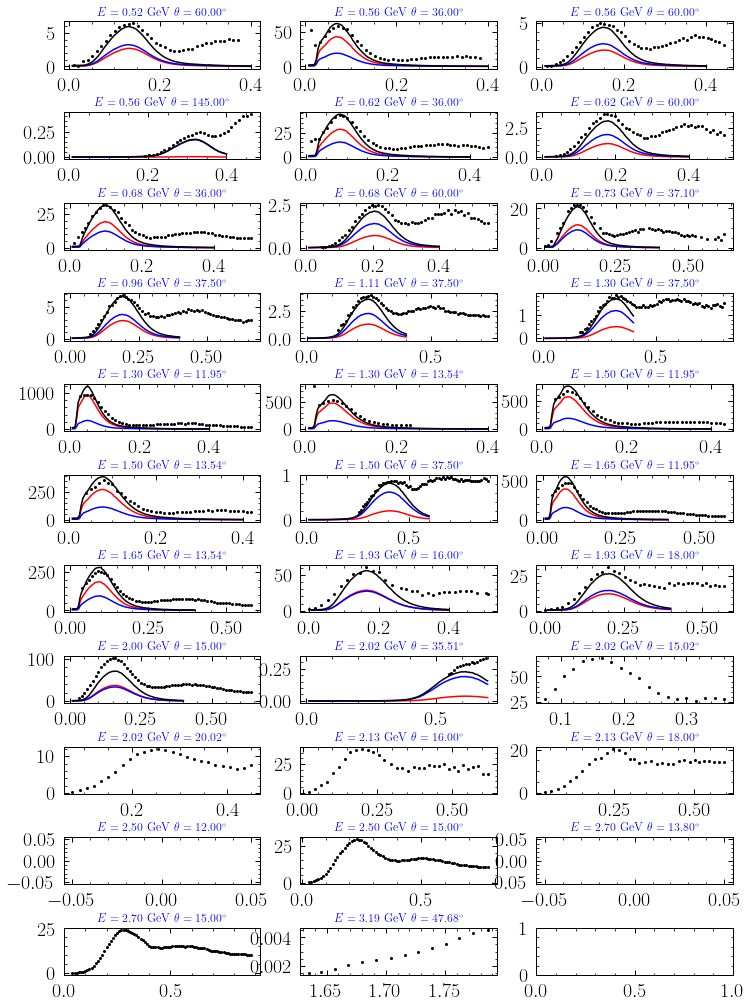

In [70]:
fig,ax = plt.subplots(11,3,figsize=(10,14))
ax = ax.flatten()
fig.tight_layout()

pred_path = '/Users/noah/Physics/Fermilab/Interference/'
pred_files = ['C12_QMC_EM_1b_519_60p0.out','C12_QMC_EM_1b_560_36p0.out','C12_QMC_EM_1b_560_60p0.out','C12_QMC_EM_1b_560_145p0.out','C12_QMC_EM_1b_620_36p0.out','C12_QMC_EM_1b_620_60p0.out','C12_QMC_EM_1b_680_36p0.out','C12_QMC_EM_1b_680_60p0.out','C12_QMC_EM_1b_730_37p1.out','C12_QMC_EM_1b_961_37p5.out', 'C12_QMC_EM_1b_1108_37p5.out','C12_QMC_EM_1b_1299_37p5.out','C12_QMC_EM_1b_1300_11p9.out','C12_QMC_EM_1b_1300_13p5.out','C12_QMC_EM_1b_1500_11p9.out','C12_QMC_EM_1b_1500_13p5.out','C12_QMC_EM_1b_1501_37p5.out','C12_QMC_EM_1b_1650_11p9.out','C12_QMC_EM_1b_1650_13p5.out','C12_QMC_EM_1b_1930_16p0.out','C12_QMC_EM_1b_1930_18p0.out','C12_QMC_EM_1b_2000_15p0.out','C12_QMC_EM_1b_2015_35p5.out']

pred_df = [pd.read_csv(pred_path+file,sep="\s+|\t+|\s+\t+|\t+\s+", engine='python') for file in pred_files]

for df in pred_df:
    df.columns = ['w', 'l','t']

p = 0
for e in Energies:
    thetas = np.unique(branches['theta_lepton'][branches['E_lepton'] == e])
    for theta in thetas:
        if p < len(pred_files):
            ax[p].plot(pred_df[p]['w']/1000, pred_df[p]['l']/1000,color='red')
            ax[p].plot(pred_df[p]['w']/1000, pred_df[p]['t']/1000,color='blue')
            ax[p].plot(pred_df[p]['w']/1000, pred_df[p]['l']/1000 + pred_df[p]['t']/1000,color='black')
        #print('e = ',e, ' and theta = ', theta)
        masks = myZ & (branches['theta_lepton'] == theta) & (branches['E_lepton'] == e)
        ax[p].errorbar( branches['E_trans'][masks], branches['dsigma'][masks]/1000, fmt='o',color='black', markersize=2)#, yerr=np.sqrt(branches['syserror'][masks]**2 + branches['randomerror'][masks]**2)/1000,label='Exp', barsabove=True,capsize=3)
        #ax[p].spines['right'].set_visible(False)
        #ax[p].spines['top'].set_visible(False)
        #ax[p].get_xaxis().tick_bottom()
        #ax[p].get_yaxis().tick_left()
        ax[p].set_title(r'$E={:.2f}$ GeV $\theta={:.2f}^\circ$'.format(e,theta),color='blue')
        p += 1
plt.savefig('inclusive_scan.png',facecolor='white',bbox_inches='tight', dpi=300)       

In [62]:
MEC_path = "/Users/noah/Physics/Fermilab/Fortran_Wrapper/Noemi-electron-QEL/src/Original/"

MECfiles = [MEC_path+"MEC_results/C12_620_60_2b_FSI2_harry_full_v3.out", MEC_path+"MEC_results/2b_730_37p5.out", MEC_path+"MEC_results/C12_1108_37p5_2b_FSI2_harry_full_v3.out"]

MEC_df = [pd.read_csv(x,sep="\s+|\t+|\s+\t+|\t+\s+", header=None, engine='python') for x in MECfiles]
for df in MEC_df:
    df.columns = ["w", "dsigma", "dsigma_err"]
    df['w'] = df['w']/1000
    df['dsigma'] = df['dsigma']/1000
    
QE_path = '/Users/noah/Physics/Fermilab/Interference/EM_Scattering/EM_inclusive_comparisons/'
QE_files = [QE_path+'C12_QMC_FSI_EM_1b_620_60p0.out',QE_path+'C12_QMC_FSI_EM_1b_730_37p1.out', QE_path+'C12_QMC_FSI_EM_1b_1108_37p5.out']

intf_files = [QE_path+'C12_QMC_FSI_EM_2b_620_60p0.out',QE_path+'C12_QMC_FSI_EM_2b_730_37p1.out', QE_path+'C12_QMC_FSI_EM_2b_1108_37p5.out']

QE_df = [pd.read_csv(pred,sep="\s+|\t+|\s+\t+|\t+\s+", engine='python') for pred in QE_files ]
for pred in QE_df:
    pred.columns = ['w', '1b','2b']
    pred['w'] = pred['w']/1000
    pred['1b'] = pred['1b']/1000

intf_df = [pd.read_csv(pred,sep="\s+|\t+|\s+\t+|\t+\s+", engine='python') for pred in intf_files ]
for pred in intf_df:
    pred.columns = ['w', '1b','2b']
    pred['w'] = pred['w']/1000
    pred['2b'] = pred['2b']/1000   
    
myEnergy3 = (branches['E_lepton'] == 1.108)
myAngle3 = (branches['theta_lepton'] == 37.5)
    
myEnergy2 = (branches['E_lepton'] == 0.730)
myAngle2 = (branches['theta_lepton'] == 37.1)

myEnergy1 = (branches['E_lepton'] == .620)
myAngle1 = (branches['theta_lepton'] == 60.0)

myZ = (branches['Z'] == 6)

masks = [myEnergy1 & myAngle1 & myZ, myEnergy2 & myAngle2 & myZ, myEnergy3 & myAngle3 & myZ]

    
# We have to interpolate the MEC cross sections
# because they were computed with slightly different binning
# Not a big effect
MEC_xsec_interp = [0,0,0]
MEC_xsec_interp[0] = np.interp(QE_df[0]['w'], MEC_df[0]['w'], MEC_df[0]['dsigma'])
MEC_xsec_interp[1] = np.interp(QE_df[1]['w'], MEC_df[1]['w'], MEC_df[1]['dsigma'])
MEC_xsec_interp[2] = np.interp(QE_df[2]['w'], MEC_df[2]['w'], MEC_df[2]['dsigma'])

KeyError: 0

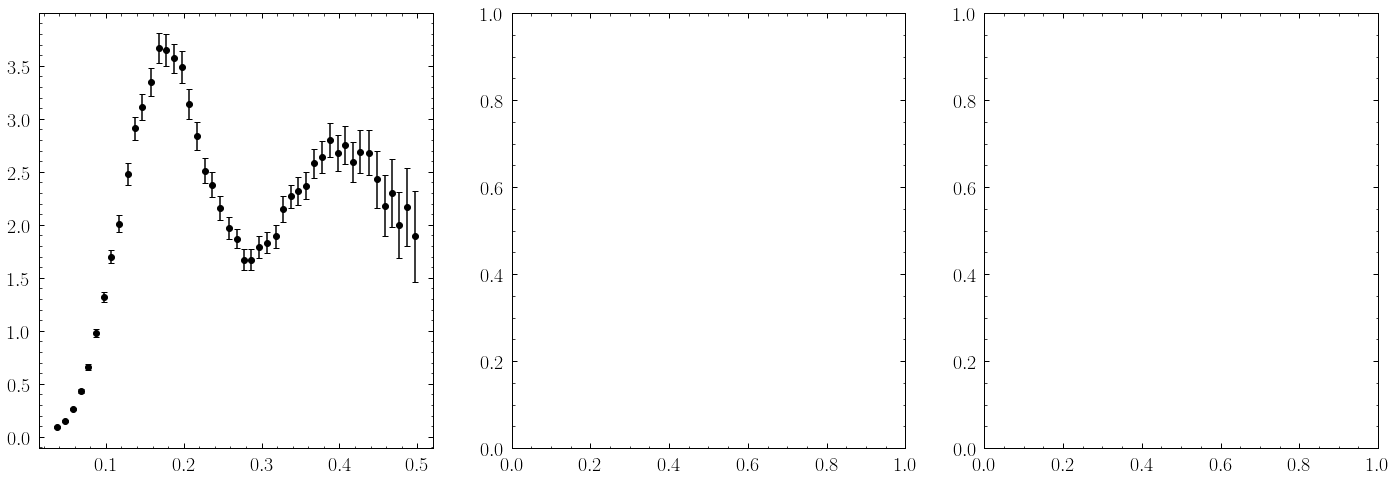

In [73]:
fig,ax = plt.subplots(1,3,figsize=(24, 8))
ax = ax.flatten()

for i in range(0,3):
    ax[i].errorbar((branches['E_trans'][masks[i]]), (branches['dsigma'][masks[i]])/1000, yerr=np.sqrt(branches['syserror'][masks[i]]**2 + branches['randomerror'][masks[i]]**2)/1000, fmt='o',color='black',label='Exp', barsabove=True,capsize=3)

    ax[i].plot(QE_df[i]['w'], QE_df[i]['1b'], color='blue', label = 'SF 1b diag', linewidth=1.5)
    ax[i].plot(MEC_df[i]['w'], MEC_df[i]['dsigma'], color='grey', linestyle='dashed', label = 'SF 2b diag',linewidth=1.5)
    #ax[i].plot(QE_df[i]['w'], MEC_xsec_interp[i] + QE_df[i]['1b'], color='violet', label = 'SF 1b + 2b diag',linewidth=1.5)
    ax[i].plot(intf_df[i]['w'], intf_df[i]['2b'], color='orange', linestyle='dotted', label = 'SF 12b interf',linewidth=1.5)
    ax[i].plot(QE_df[i]['w'], MEC_xsec_interp[i] + QE_df[i]['1b'] + intf_df[i]['2b'], color='black', label = 'SF total',linewidth=1.5)
    
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].get_xaxis().tick_bottom()
    ax[i].get_yaxis().tick_left()
    
    
    ax[i].xaxis.set_tick_params(labelsize=28)
    ax[i].yaxis.set_tick_params(labelsize=28)
    
    
    ax[i].set_xlim([0,.3])
    ax[i].set_ylim([0,4.2])

ax[1].set_ylim([0,5])    
    
#ax[0].set_xlim([0.05,.3])
#ax[1].set_xlim([0,.25])
ax[2].set_xlim([0.05,.4])    
ax[0].set_title(r"$E_{e}= 620\,\rm{MeV},\, \theta_{e'}=60.0^\circ$",fontsize=20, pad=20)
ax[1].set_title(r"$E_{e}= 730\,\rm{MeV},\, \theta_{e'}=37.1^\circ$",fontsize=20, pad=20)
ax[2].set_title(r"$E_{e}= 1108\,\rm{MeV},\, \theta_{e'}=37.5^\circ$",fontsize=20, pad=20)
    
ax[2].legend(loc='center left',bbox_to_anchor=(1.0,0.5), prop={'size': 18})

fig.supxlabel(r"$\omega$ [GeV]",fontsize=28)
fig.supylabel(r"$\rm{d}\sigma/d\Omega_{e'}dE_{e'}$ [nb/sr MeV]",fontsize=28,color='black')
#plt.savefig('Electron_scattering_QE_int_MEC.png',facecolor='white',bbox_inches='tight', dpi=300)

In [2]:
#Testing EW piece with axial sector turned off 
QE_path = '/Users/noah/Physics/Fermilab/Interference/EW_Scattering/'

QE_CBF_V_file = QE_path+'C12_CBF_noFSI_V_EW_1b_620_60p0.out'
QE_CBF_file = QE_path+'C12_CBF_noFSI_EW_1b_620_60p0.out'
QE_QMC_file = QE_path+'C12_QMC_noFSI_EW_1b_620_60p0.out'

intf_CBF_V_file = QE_path+'C12_CBF_noFSI_V_EW_2b_620_60p0.out'
intf_CBF_file = QE_path+'C12_CBF_noFSI_EW_2b_620_60p0.out'
intf_QMC_file = QE_path+'C12_QMC_noFSI_EW_v2_2b_620_60p0.out'
#intf_file_noPiPl = QE_path+'C12_QMC_noFSI_noPiPl_EW_2b_620_60p0.out'

QE_CBF_V_df = pd.read_csv(QE_CBF_V_file,sep="\s+|\t+|\s+\t+|\t+\s+", engine='python') 
QE_CBF_V_df.columns = ['w', '1b', '2b']

QE_CBF_df = pd.read_csv(QE_CBF_file,sep="\s+|\t+|\s+\t+|\t+\s+", engine='python') 
QE_CBF_df.columns = ['w', '1b', '2b']

QE_QMC_df = pd.read_csv(QE_QMC_file,sep="\s+|\t+|\s+\t+|\t+\s+", engine='python') 
QE_QMC_df.columns = ['w', '1b', '2b']

intf_CBF_V_df = pd.read_csv(intf_CBF_V_file,sep="\s+|\t+|\s+\t+|\t+\s+", engine='python') 
intf_CBF_V_df.columns = ['w', '1b', '2b']

intf_CBF_df = pd.read_csv(intf_CBF_file,sep="\s+|\t+|\s+\t+|\t+\s+", engine='python') 
intf_CBF_df.columns = ['w', '1b', '2b']

intf_QMC_df = pd.read_csv(intf_QMC_file,sep="\s+|\t+|\s+\t+|\t+\s+", engine='python') 
intf_QMC_df.columns = ['w', '1b', '2b']




Text(0.02, 0.5, "$\\rm{d}\\sigma/d\\cos_{\\mu'}dE_{\\mu'}$ $[10^{-15} \\rm{fm}^{2}/\\rm{MeV}]$")

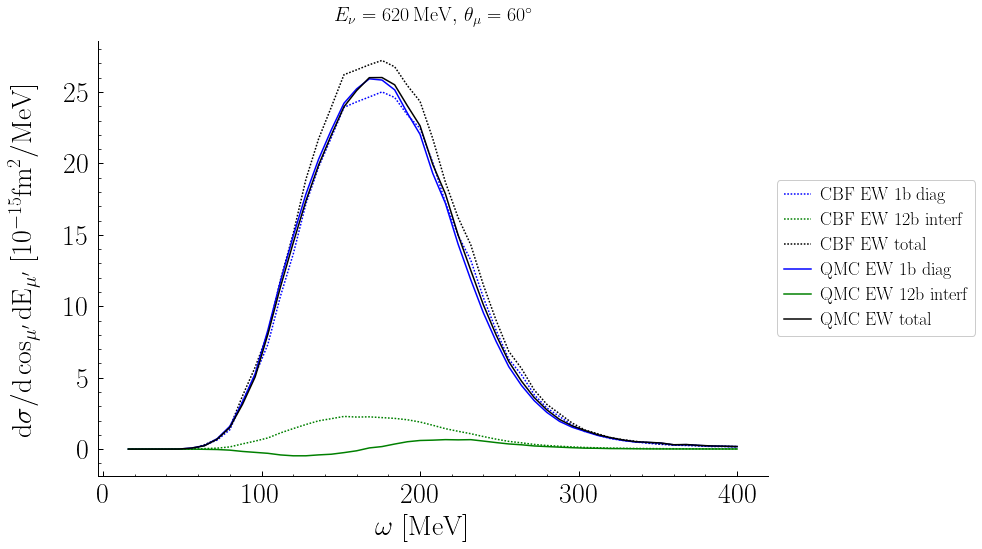

In [3]:
fig,ax = plt.subplots(1,1,figsize=(12, 8))

#ax.plot(QE_CBF_V_df['w'], QE_CBF_V_df['1b'], color='blue', label = 'CBF EW V 1b diag', linewidth=1.5,linestyle='dashed')
#ax.plot(intf_CBF_V_df['w'], intf_CBF_V_df['2b'], color='green', label = 'CBF EW V 12b interf',linewidth=1.5,linestyle='dashed')
#ax.plot(QE_CBF_V_df['w'], QE_CBF_V_df['1b'] + intf_CBF_V_df['2b'], color='black', label = 'CBF EW V total',linewidth=1.5,linestyle='dashed')

ax.plot(QE_CBF_df['w'], QE_CBF_df['1b'], color='blue', label = 'CBF EW 1b diag', linewidth=1.5,linestyle=':')
ax.plot(intf_CBF_df['w'], intf_CBF_df['2b'], color='green', label = 'CBF EW 12b interf',linewidth=1.5,linestyle=':')
ax.plot(QE_CBF_df['w'], QE_CBF_df['1b'] + intf_CBF_df['2b'], color='black', label = 'CBF EW total',linewidth=1.5,linestyle=':')
    
ax.plot(QE_QMC_df['w'], QE_QMC_df['1b'], color='blue', label = 'QMC EW 1b diag', linewidth=1.5,linestyle='solid')
ax.plot(intf_QMC_df['w'], intf_QMC_df['2b'], color='green', label = 'QMC EW 12b interf',linewidth=1.5,linestyle='solid')
ax.plot(QE_QMC_df['w'], QE_QMC_df['1b'] + intf_QMC_df['2b'], color='black', label = 'QMC EW total',linewidth=1.5,linestyle='solid')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
    
    
ax.xaxis.set_tick_params(labelsize=28)
ax.yaxis.set_tick_params(labelsize=28)
    
#ax.set_ylim([0.0,7.6])    

ax.set_title(r"$E_{\nu}= 620\,\rm{MeV},\, \theta_{\mu}=60^\circ$",fontsize=20, pad=20)
    
ax.legend(loc='center left',bbox_to_anchor=(1.0,0.5), prop={'size': 18})

fig.supxlabel(r"$\omega$ [MeV]",fontsize=28)
fig.supylabel(r"$\rm{d}\sigma/d\cos_{\mu'}dE_{\mu'}$ $[10^{-15} \rm{fm}^{2}/\rm{MeV}]$",fontsize=28,color='black')
#plt.savefig('Electron_scattering_QE_int_MEC.png',facecolor='white',bbox_inches='tight', dpi=300)

In [52]:
QE_EM_path = '/Users/noah/Physics/Fermilab/Interference/EM_Scattering/EM_inclusive_comparisons/'
QE_EM_files = [QE_EM_path+'C12_QMC_FSI_EM_1b_620_60p0.out',QE_EM_path+'C12_QMC_FSI_EM_1b_730_37p1.out', QE_EM_path+'C12_QMC_FSI_EM_1b_1108_37p5.out']

intf_EM_files = [QE_EM_path+'C12_QMC_FSI_EM_2b_620_60p0.out',QE_EM_path+'C12_QMC_FSI_EM_2b_730_37p1.out', QE_EM_path+'C12_QMC_FSI_EM_2b_1108_37p5.out']

QE_EM_df = [pd.read_csv(pred,sep="\s+|\t+|\s+\t+|\t+\s+", engine='python') for pred in QE_EM_files ]
for pred in QE_EM_df:
    pred.columns = ['w', '1b','2b']
    pred['w'] = pred['w']
    pred['1b'] = pred['1b']/1000

intf_EM_df = [pd.read_csv(pred,sep="\s+|\t+|\s+\t+|\t+\s+", engine='python') for pred in intf_EM_files ]
for pred in intf_EM_df:
    pred.columns = ['w', '1b','2b']
    pred['w'] = pred['w']
    pred['2b'] = pred['2b']/1000   

Text(0.5, 0.98, 'QMC SF Responses, q = 400 MeV')

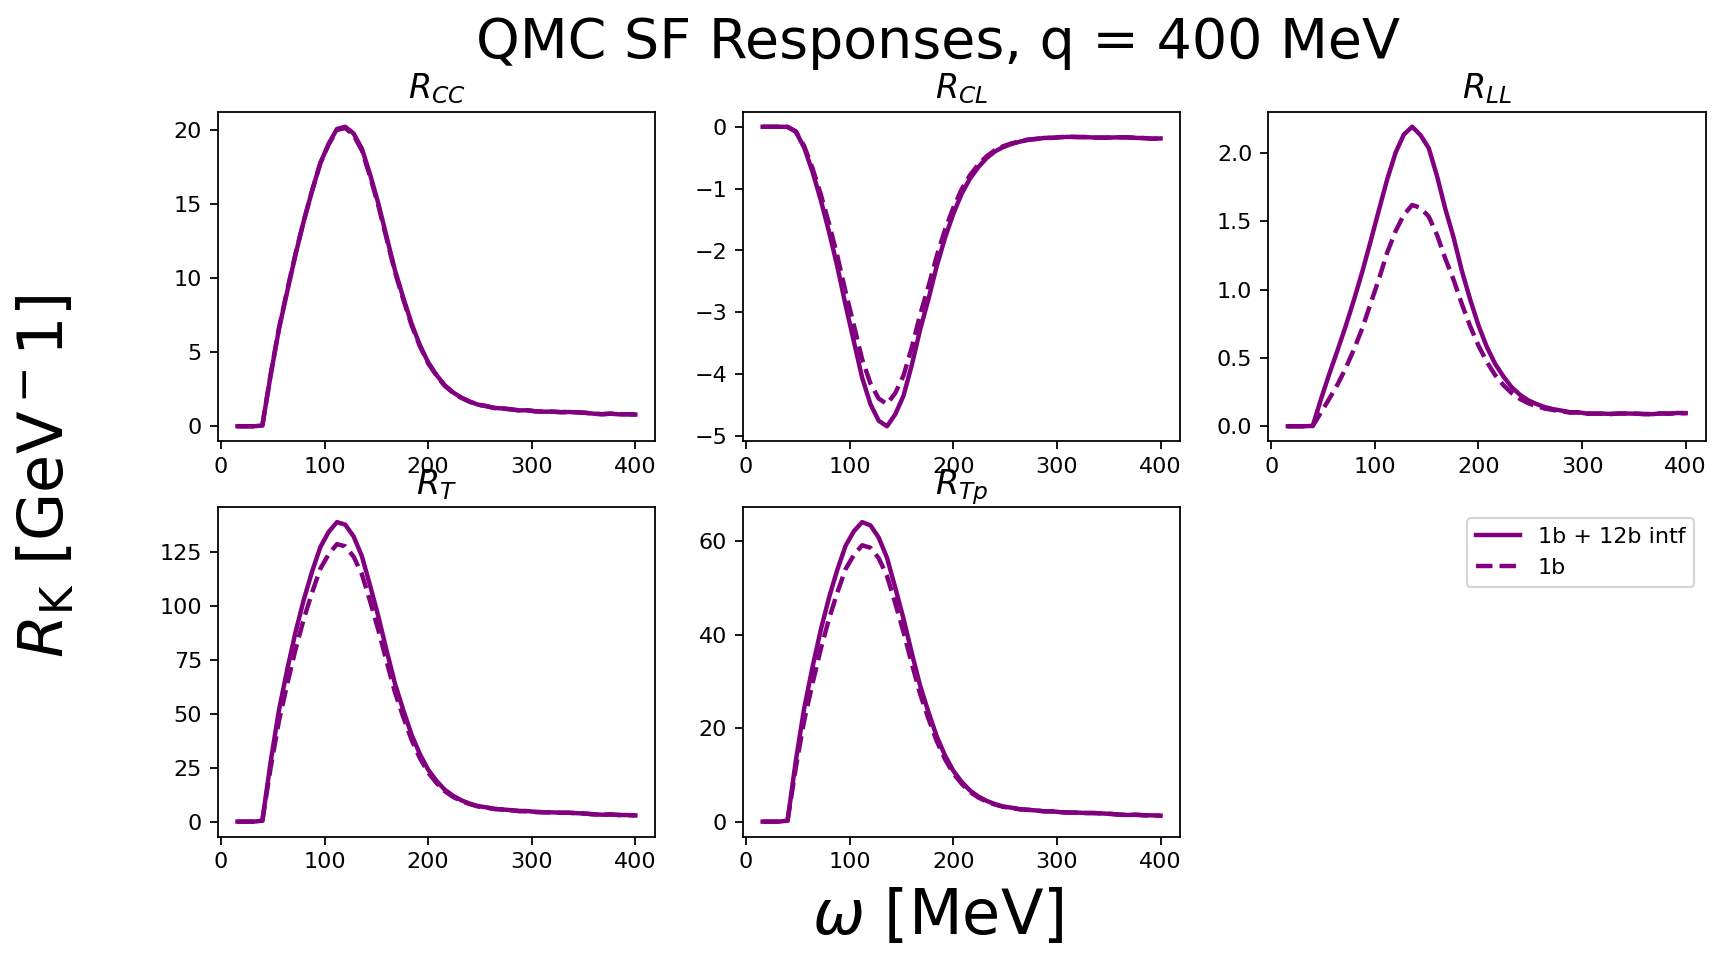

In [3]:
import numpy as np
import pandas as pd
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt

QE_path = '/Users/noah/Physics/Fermilab/Interference/EW_responses/'

intf_files = [QE_path+'C12_QMC_EW_2b_resp.out']
QE_files = [QE_path+'C12_QMC_EW_1b_resp.out']
intf_VV_files = [QE_path+'C12_QMC_EW_VV_2b_resp.out']

eps = 50.  
mn = 939.
kF=260.
def y_int_nr(wr,qr):
    return mn/qr/kF*(wr-qr**2/2/mn-eps)

QE_df = [pd.read_csv(pred,sep="\s+|\t+|\s+\t+|\t+\s+", engine='python') for pred in QE_files ]
for pred in QE_df:
    pred.columns = ['w', 'rcc','rcl', 'rll', 'rt', 'rtp']
    pred['w'] = pred['w']
    pred['rcc'] = pred['rcc']*1000
    pred['rcl'] = pred['rcl']*1000
    pred['rll'] = pred['rll']*1000
    pred['rt'] = pred['rt']*1000
    pred['rtp'] = pred['rtp']*1000
    pred['ynr'] = pred['w'].apply(lambda x : y_int_nr(x,400.))

intf_df = [pd.read_csv(pred,sep="\s+|\t+|\s+\t+|\t+\s+", engine='python') for pred in intf_files ]
for pred in intf_df:
    pred.columns = ['w', 'rcc','rcl', 'rll', 'rt', 'rtp']
    pred['w'] = pred['w']
    pred['rcc'] = pred['rcc']*1000
    pred['rcl'] = pred['rcl']*1000
    pred['rll'] = pred['rll']*1000
    pred['rt'] = pred['rt']*1000
    pred['rtp'] = pred['rtp']*1000
    pred['ynr'] = pred['w'].apply(lambda x : y_int_nr(x,400.))
    
intf_VV_df = [pd.read_csv(pred,sep="\s+|\t+|\s+\t+|\t+\s+", engine='python') for pred in intf_VV_files ]
for pred in intf_VV_df:
    pred.columns = ['w', 'rcc','rcl', 'rll', 'rt', 'rtp']
    pred['w'] = pred['w']
    pred['rcc'] = pred['rcc']*1000
    pred['rcl'] = pred['rcl']*1000
    pred['rll'] = pred['rll']*1000
    pred['rt'] = pred['rt']*1000
    pred['rtp'] = pred['rtp']*1000
    pred['ynr'] = pred['w'].apply(lambda x : y_int_nr(x,400.))

    
fig,ax = plt.subplots(2,3,figsize=(12, 6), dpi=160, facecolor='w', edgecolor='k')
#fig.tight_layout()
ax = ax.flatten()

titles = [r'$R_{CC}$', r'$R_{CL}$', r'$R_{LL}$', r'$R_{T}$', r'$R_{Tp}$']
     
ax[0].plot(QE_df[0]['w'],QE_df[0]['rcc'] + intf_df[0]['rcc'], color='purple', linewidth=2, linestyle='solid',label='12b')   
ax[0].plot(intf_df[0]['w'],QE_df[0]['rcc'], color='purple', linewidth=2, linestyle='--',label='2b intf')
#ax[0].plot(intf_VV_df[0]['w'],intf_VV_df[0]['rcc'], color='blue', linestyle=':',label='VV Intf')
#ax[0].plot(intf_df[0]['w'],intf_df[0]['rcc'] - intf_VV_df[0]['rcc'], color='green', linestyle='-.',label='VA + AA Intf')

     
ax[1].plot(QE_df[0]['w'],QE_df[0]['rcl'] + intf_df[0]['rcl'], color='purple', linewidth=2, linestyle='solid',label='Total Intf') 
ax[1].plot(intf_df[0]['w'],QE_df[0]['rcl'], color='purple', linewidth=2, linestyle='--')
#ax[1].plot(intf_VV_df[0]['w'],intf_VV_df[0]['rcl'], color='blue', linestyle=':')
#ax[1].plot(intf_df[0]['w'],intf_df[0]['rcl'] - intf_VV_df[0]['rcl'], color='green', linestyle='-.')

     
ax[2].plot(QE_df[0]['w'],QE_df[0]['rll'] + intf_df[0]['rll'], color='purple', linewidth=2, linestyle='solid',label='Total Intf') 
ax[2].plot(intf_df[0]['w'],QE_df[0]['rll'], color='purple', linewidth=2, linestyle='--')
#ax[2].plot(intf_VV_df[0]['w'],intf_VV_df[0]['rll'], color='blue', linestyle=':')
#ax[2].plot(intf_df[0]['w'],intf_df[0]['rll'] - intf_VV_df[0]['rll'], color='green', linestyle='-.')

     
ax[3].plot(QE_df[0]['w'],QE_df[0]['rt'] + intf_df[0]['rt'], color='purple', linewidth=2, linestyle='solid',label='Total Intf') 
ax[3].plot(intf_df[0]['w'],QE_df[0]['rt'], color='purple', linewidth=2, linestyle='--')
#ax[3].plot(intf_VV_df[0]['w'],intf_VV_df[0]['rt'], color='blue', linestyle=':')
#ax[3].plot(intf_df[0]['w'],intf_df[0]['rt'] - intf_VV_df[0]['rt'], color='green', linestyle='-.')

     
ax[4].plot(QE_df[0]['w'],QE_df[0]['rtp'] + intf_df[0]['rtp'], color='purple', linewidth=2, linestyle='solid',label='Total Intf') 
ax[4].plot(intf_df[0]['w'],QE_df[0]['rtp'], color='purple', linewidth=2, linestyle='--')
#ax[4].plot(intf_VV_df[0]['w'],intf_VV_df[0]['rtp'], color='blue', linestyle=':')
#ax[4].plot(intf_df[0]['w'],intf_df[0]['rtp'] - intf_VV_df[0]['rtp'], color='green', linestyle='-.')
    
ax[5].axis('off') 
ax[5].plot(0,0, color='purple', linewidth=2, linestyle='solid',label='1b + 12b intf') 
ax[5].plot(0,0, color='purple', linewidth=2, linestyle='--',label='1b')
#ax[5].plot(0,0, color='blue', linestyle=':',label='VV Intf')
#ax[5].plot(0,0, color='green', linestyle='-.',label='VA + AA Intf')
ax[5].legend()
for i,axis in enumerate(ax):
    if i < 5:
        axis.set_title(titles[i],fontsize=15)
    
fig.supxlabel(r"$\omega$ $[\rm{MeV}]$",fontsize=28)
fig.supylabel(r"$R_{\rm{K}}$ $[\rm{GeV}^-1]$",fontsize=28,color='black')  
fig.suptitle(r"QMC SF Responses, q = 400 MeV",fontsize=25)

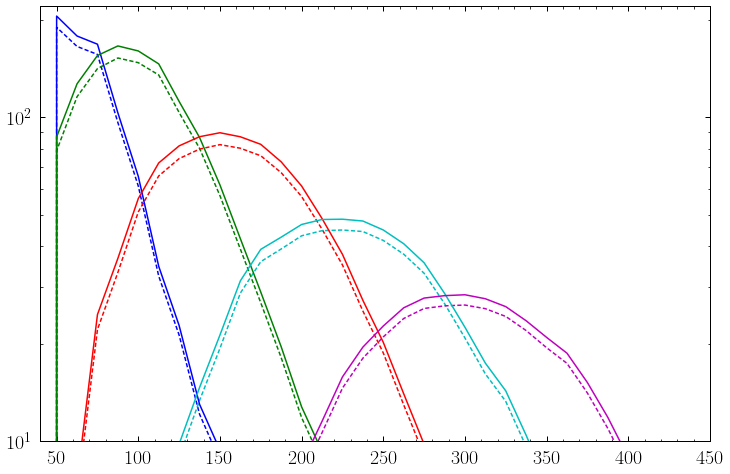

In [70]:
#Testing angular dependence of 2b cross EW cross section
#QE_files = ['C12_QMC_noFSI_EW_1b_620_10p0.out','C12_QMC_noFSI_EW_1b_620_20p0.out','C12_QMC_noFSI_EW_1b_620_30p0.out','C12_QMC_noFSI_EW_1b_620_40p0.out','C12_QMC_noFSI_EW_1b_620_50p0.out','C12_QMC_noFSI_EW_1b_620_60p0.out','C12_QMC_noFSI_EW_1b_620_90p0.out']

#intf_files = ['C12_QMC_noFSI_EW_2b_620_10p0.out','C12_QMC_noFSI_EW_2b_620_20p0.out','C12_QMC_noFSI_EW_2b_620_30p0.out','C12_QMC_noFSI_EW_2b_620_40p0.out','C12_QMC_noFSI_EW_2b_620_50p0.out','C12_QMC_noFSI_EW_2b_620_60p0.out','C12_QMC_noFSI_EW_2b_620_90p0.out']

QE_files = ['C12_QMC_noFSI_EW_1b_1000_10p0.out','C12_QMC_noFSI_EW_1b_1000_20p0.out','C12_QMC_noFSI_EW_1b_1000_30p0.out','C12_QMC_noFSI_EW_1b_1000_40p0.out','C12_QMC_noFSI_EW_1b_1000_50p0.out']

intf_files = ['C12_QMC_noFSI_EW_2b_1000_10p0.out','C12_QMC_noFSI_EW_2b_1000_20p0.out','C12_QMC_noFSI_EW_2b_1000_30p0.out','C12_QMC_noFSI_EW_2b_1000_40p0.out','C12_QMC_noFSI_EW_2b_1000_50p0.out']

path = '/Users/noah/Physics/Fermilab/Interference/EW_Scattering/2b_angle_scan/'
QE_files = [path+x for x in QE_files]
intf_files = [path+x for x in intf_files]


intf_df = [pd.read_csv(intf_file,sep="\s+|\t+|\s+\t+|\t+\s+", engine='python') for intf_file in intf_files]

for df in intf_df:
    df.columns = ['w', '1b', '2b']
    df=df.fillna(0)
    
QE_df = [pd.read_csv(QE_file,sep="\s+|\t+|\s+\t+|\t+\s+", engine='python') for QE_file in QE_files]

    
for df in QE_df:
    df.columns = ['w', '1b', '2b']
    df=df.fillna(0)
    
fig,ax = plt.subplots(1,1,figsize=(12, 8))
colors = ['b','g','r','c','m','y','b']

for i,df in enumerate(QE_df):
    ax.plot(df['w'], df['1b'], linestyle='dashed', color=colors[i], linewidth=1.5)

for i in range(0,5):
    ax.plot(QE_df[i]['w'], QE_df[i]['1b'] + intf_df[i]['2b'], linestyle='solid', color=colors[i], linewidth=1.5)
    
ax.set_yscale('log')
ax.set_xlim([40,450])
ax.set_ylim([10,220])

from scipy import integrate
QE_int = [0,0,0,0,0,0,0]
Intf_int = [0,0,0,0,0,0,0]
for i in range(0,5):
    QE_int[i] = integrate.cumtrapz(QE_df[i]['1b'],QE_df[i]['w'])
    Intf_int[i] = integrate.cumtrapz(intf_df[i]['2b'],intf_df[i]['w'])

In [64]:
for i in range(0,5):
    print('intf/QE ratio: ', Intf_int[i]/(QE_int[i]+Intf_int[i]))

intf/QE ratio:  [       nan 0.07664931 0.07507143 0.0735079  0.07247776 0.07176894
 0.07142494 0.0712438  0.07113817 0.07111782 0.0711297  0.07114515
 0.07118107 0.07120695 0.07121693 0.07123244 0.07124092 0.07124055
 0.07123871 0.07123419 0.07122342 0.07121531 0.07120898 0.0712003
 0.07119178 0.07118497 0.07117827 0.07117168 0.07116651 0.07116177
 0.07115591 0.07115016 0.07114533 0.0711402  0.07113546 0.07113254
 0.07112999 0.07112733 0.07112508 0.07112272 0.07112049 0.07111901
 0.07111783 0.07111688 0.07111595 0.0711151  0.07111447 0.07111381
 0.07111309 0.07111257 0.07111235 0.07111214 0.07111196 0.07111178
 0.07111165 0.07111158 0.07111149 0.07111145 0.07111138 0.07111133
 0.0711113  0.07111127 0.07111123 0.07111119 0.07111117 0.07111114
 0.07111113 0.07111112 0.0711111         nan        nan        nan
        nan        nan        nan        nan        nan        nan]
intf/QE ratio:  [       nan 0.09338485 0.0909859  0.08970099 0.08816631 0.0862839
 0.08461762 0.08332563 0.082496

<ipython-input-64-7580a13aa0aa>:2: RuntimeWarning: invalid value encountered in divide
  print('intf/QE ratio: ', Intf_int[i]/(QE_int[i]+Intf_int[i]))
